In [28]:
import pandas as pd
import xarray as xr
import numpy as np

import matplotlib.pyplot as plt

In [5]:
fn = xr.open_dataset('/Users/victoriaford/Desktop/Train_Files/ASOSAWOS_72051724165.nc')
df = fn.to_dataframe()
df

/Users/victoriaford/anaconda3/envs/histobs/lib/python3.11/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/Users/victoriaford/anaconda3/envs/histobs/lib/python3.11/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")


ps     tas    tdps  pr  \
station              time                                               
ASOSAWOS_72051724165 2013-06-27 12:55:00  78690.0  284.45  277.95 NaN   
                     2013-06-27 13:15:00      NaN  285.65  277.95 NaN   
                     2013-06-27 13:35:00      NaN  287.05  278.15 NaN   
                     2013-06-27 13:55:00  78750.0  289.05  278.65 NaN   
                     2013-06-27 14:15:00      NaN  289.95  278.85 NaN   
...                                           ...     ...     ...  ..   
                     2022-08-11 20:15:00  78640.0  300.15  276.15 NaN   
                     2022-08-11 20:35:00  78580.0  301.15  279.15 NaN   
                     2022-08-11 20:55:00  78580.0  301.15  279.15 NaN   
                     2022-08-11 21:15:00  78530.0  301.15  279.15 NaN   
                     2022-08-11 21:35:00  78560.0  302.15  279.15 NaN   

                                          sfcWind  sfcWind_dir  elevation  \
station              time                                                   
ASOSAWOS_72051724165 2013-06-27 12:55:00      5.7        350.0     2220.0   
                     2013-06-27 13:15:00      5.7        350.0     2220.0   
                     2013-06-27 13:35:00      4.6        350.0     2220.0   
                     2013-06-27 13:55:00      4.6        350.0     2220.0   
                     2013-06-27 14:15:00      4.6        360.0     2220.0   
...                                           ...          ...        ...   
                     2022-08-11 20:15:00      7.2        260.0     2220.0   
                     2022-08-11 20:35:00      9.8        240.0     2220.0   
                     2022-08-11 20:55:00      5.7        290.0     2220.0   
                     2022-08-11 21:15:00     10.3        250.0     2220.0   
                     2022-08-11 21:35:00      6.7        280.0     2220.0   

                                         qaqc_process ps_qc  ps_altimeter  \
station              time                                                   
ASOSAWOS_72051724165 2013-06-27 12:55:00         V020     5      103010.0   
                     2013-06-27 13:15:00         V020     0      103050.0   
                     2013-06-27 13:35:00         V020     0      103050.0   
                     2013-06-27 13:55:00         V020     5      103080.0   
                     2013-06-27 14:15:00         V020     0      103080.0   
...                                               ...   ...           ...   
                     2022-08-11 20:15:00         V020     5      102950.0   
                     2022-08-11 20:35:00         V020     5      102880.0   
                     2022-08-11 20:55:00         V020     5      102880.0   
                     2022-08-11 21:15:00         V020     5      102810.0   
                     2022-08-11 21:35:00         V020     5      102840.0   

                                          ... tas_qc tdps_qc pr_qc  \
station              time                 ...                        
ASOSAWOS_72051724165 2013-06-27 12:55:00  ...      5       5         
                     2013-06-27 13:15:00  ...      1       1         
                     2013-06-27 13:35:00  ...      1       1         
                     2013-06-27 13:55:00  ...      5       5         
                     2013-06-27 14:15:00  ...      1       1         
...                                       ...    ...     ...   ...   
                     2022-08-11 20:15:00  ...      5       5         
                     2022-08-11 20:35:00  ...      5       5         
                     2022-08-11 20:55:00  ...      C       C         
                     2022-08-11 21:15:00  ...      5       5         
                     2022-08-11 21:35:00  ...      5       5         

                                         pr_duration pr_depth_qc sfcWind_qc  \
station              time                                                     
ASOSAWOS_72051724165 201

In [11]:
vars_to_remove = ['qc', 'duration', 'method']
vars_to_include = ['tas', 'tdps', 'ps'] # list of var substrings to remove if present in var
vars_to_check = [var for var in df.columns if any(True for item in vars_to_include if item in var) and not any(True for item in vars_to_remove if item in var)]
vars_to_check

['ps', 'tas', 'tdps', 'ps_altimeter']

In [12]:
for var in vars_to_check:
    df[var+'_eraqc'] = np.nan

In [19]:
tas_arr = df['tas']

In [101]:
def create_bins(data, bin_size=0.25):
    '''Create bins from data covering entire data range'''

    # set up bins
    b_min = np.floor(np.nanmin(data))
    b_max = np.ceil(np.nanmax(data))
    bins = np.arange(b_min - bin_size, b_max + (3. * bin_size), bin_size)

    return bins

In [102]:
bins = create_bins(tas_arr, bin_size=1)
bar_counts, bins = np.histogram(tas_arr, bins=bins)

(array([0.0000e+00, 5.0000e+00, 7.0000e+00, 8.0000e+00, 1.1000e+01,
        2.4000e+01, 4.2000e+01, 2.9000e+01, 7.7000e+01, 1.6800e+02,
        2.3800e+02, 3.4700e+02, 2.0400e+02, 4.3800e+02, 5.8100e+02,
        5.9100e+02, 7.4100e+02, 4.1700e+02, 9.9000e+02, 1.3760e+03,
        1.6620e+03, 1.8890e+03, 1.0580e+03, 2.4090e+03, 2.8030e+03,
        3.2390e+03, 3.6430e+03, 2.0800e+03, 4.6050e+03, 5.1250e+03,
        6.1900e+03, 1.2397e+04, 7.3780e+03, 7.6440e+03, 7.1520e+03,
        3.3670e+03, 6.3520e+03, 6.0810e+03, 6.0430e+03, 6.1680e+03,
        3.1570e+03, 6.3590e+03, 6.3260e+03, 5.8860e+03, 5.3740e+03,
        2.6430e+03, 4.8280e+03, 4.4850e+03, 4.0050e+03, 3.6760e+03,
        1.7460e+03, 3.0360e+03, 2.7410e+03, 2.7270e+03, 2.6530e+03,
        1.3550e+03, 2.3560e+03, 2.0280e+03, 1.7230e+03, 1.3460e+03,
        5.1200e+02, 5.1200e+02, 2.1600e+02, 5.9000e+01, 3.0000e+00,
        0.0000e+00, 0.0000e+00]),
 array([242., 243., 244., 245., 246., 247., 248., 249., 250., 251., 252.,
        

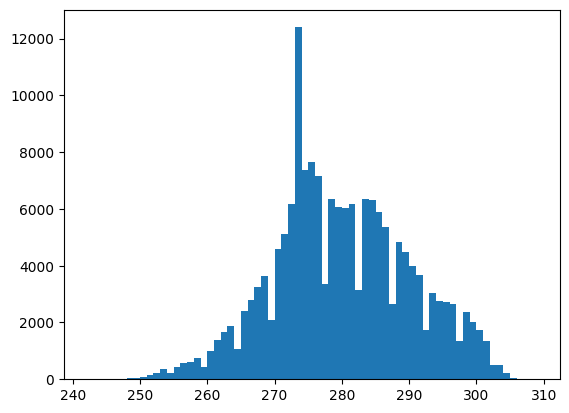

In [50]:
plt.hist(tas_arr, bins=bins)

In [ ]:
def frequent_allobs(df, bar_counts, bin_main_thresh=30):

    # first scans suspect values using entire record
    for i in range(0, len(bar_counts)):
        # identify main bin + 3 on either side
        bin_start = i-3
        bin_end = i+4

        # need handling for first 3 blocks as there is no front
        if i < 3:
            bin_start = 0

        bin_block_sum = bar_counts[bin_start:bin_end].sum() # num of obs in the 7-bin block
        bin_main_sum = bar_counts[i] # num of obs in main bin

        # determine whether main bin is more than half sum in 7-block bin
        bin_block_half = bin_block_sum / 2

        if (bin_main_sum > bin_block_half) == True:            
            # ensure that bin_main_sum is greater than 30
            if bin_main_sum > bin_main_thresh:
                # indicate as suspect bins
                # preliminary flag? and then remove if okay/reset to nan?
            else: # less than 30 obs in bin_main_sum
                # do not indicate as suspect
                
    return df

In [ ]:
def qaqc_frequent_vals(df, plots=True):
    '''Frequent values check:
        - Initially > 50% of all data in current 0.5 degC/hPa bin 
        - out of "this and +/- 3 bins for all data to highlight with >30 (obs?) in the bin
        - On yearly basis using highlighted bins with 50% of data and >=20 obs in this and +/- 3 bins OR
        - 90% data and >=10 observations in this and +/-3 bins
        - for seasons, bin size thresholds are reduced to 20, 15, and 10 respectively
        
        Note: tas and tdps are synergistic
            - if t is bad, tdps is also removed, and vice versa
    '''
    
    # this check is only done on air temp, dewpoint temp, and pressure
    vars_to_remove = ['qc', 'duration', 'method']
    vars_to_include = ['tas', 'tdps', 'ps'] # list of var substrings to remove if present in var
    vars_to_check = [var for var in df.columns if any(True for item in vars_to_include if item in var) and not any(True for item in vars_to_remove if item in var)]

    for var in vars_to_check:
        
        # set-up flag vars
        df[var+'_eraqc'] = np.nan
        
        bins = create_bins(df[var], bin_size=1)
        bar_counts, bins = np.histogram(df[var], bins=bins)
        
        # first scans suspect values using entire record
        df = frequent_allobs(df, bar_counts, bin_main_thresh=30)
        
        
                
    # then scans for each value on a year-by-year basis to flag if they are a problem within that year
    
        
        
    # histograms created with 0.5 or 1.0 or hpa increments (depending on accuracy of instrument)
        # each bin compared to the three on either side
        # if this bin contains more than half the total population of the seven bins combined
        # and more than 30 observations over the station record (20 for seasonal)
        # then histogram bin is highlighted for further investigation
        # minimum number limit imposted to avoid removing true tails of distribution
        
    # studied on annual basis (year to year)
        # if highlighted bins are prominent (>50% of obs of all 7 bins and 20+ in year or 90% of obs in 7 bins and 10+ in year)
        # obs are flagged
    
    
    
    # also run seasonally (JF+D, MAM, JJA, SON)
        # each season is scanned over entire record to identify problem values
        # only flags applied on annual basis using the three months on their own
        # NOTE: HadISD approach is to use the current year's december, rather than the preceeding december
        
        # seasonal version because seasonal shift in distribution of temps/dewpoints can reveal hidden values
